In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [24]:
df_org = pd.read_csv("../../amz_uk_price_prediction_dataset.csv")
df = df_org.copy()




df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [25]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [26]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O'), dtype('bool')]

In [27]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [28]:
df.select_dtypes("number").nunique().sort_values(ascending = False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [29]:
df_numerical = df.select_dtypes("number")
df_numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [30]:
df_categorical = df.select_dtypes("object")
df_categorical

,asin,title,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,Hi-Fi Speakers
...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",Motorbike Clothing
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,Motorbike Clothing
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,Motorbike Clothing
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,Motorbike Clothing


36540.202700613874 0.0
0.04323354945446208


<Axes: xlabel='category'>

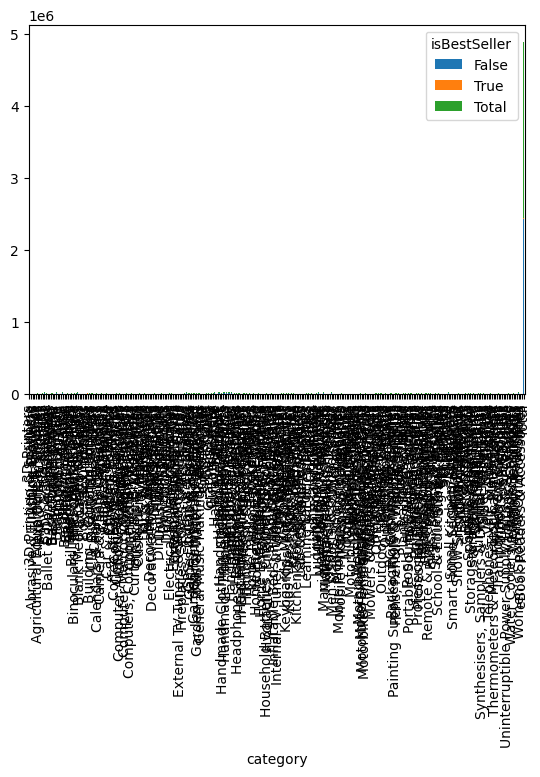

In [44]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#Objective: Understand the relationship between product categories and their best-seller status.
 #   Crosstab Analysis:
  #      Create a crosstab between the product category and the isBestSeller status.
   #     Are there categories where being a best-seller is more prevalent?
    #    Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


crosstab = pd.crosstab(df['category'], df['isBestSeller'], margins=True, margins_name="Total")
crosstab

#    Statistical Tests:
 #       Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
  #      Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)
print(chi2_statistic, chi2_p_value)

from scipy.stats.contingency import association

print(association(crosstab, method="cramer"))


   # Visualizations:
    #    Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab.plot(kind="bar", stacked = True)


In [45]:
df_best = df.groupby("category")["isBestSeller"]
df_best.count()

category
3D Printers                         248
3D Printing & Scanning             4067
Abrasive & Finishing Products       250
Action Cameras                     1697
Adapters                            254
                                  ...  
Wind Instruments                    250
Window Treatments                   239
Women                             17772
Women's Sports & Outdoor Shoes     1959
eBook Readers & Accessories         246
Name: isBestSeller, Length: 296, dtype: int64

Original number of rows: 2443651
Number of rows after removing outliers: 2115963


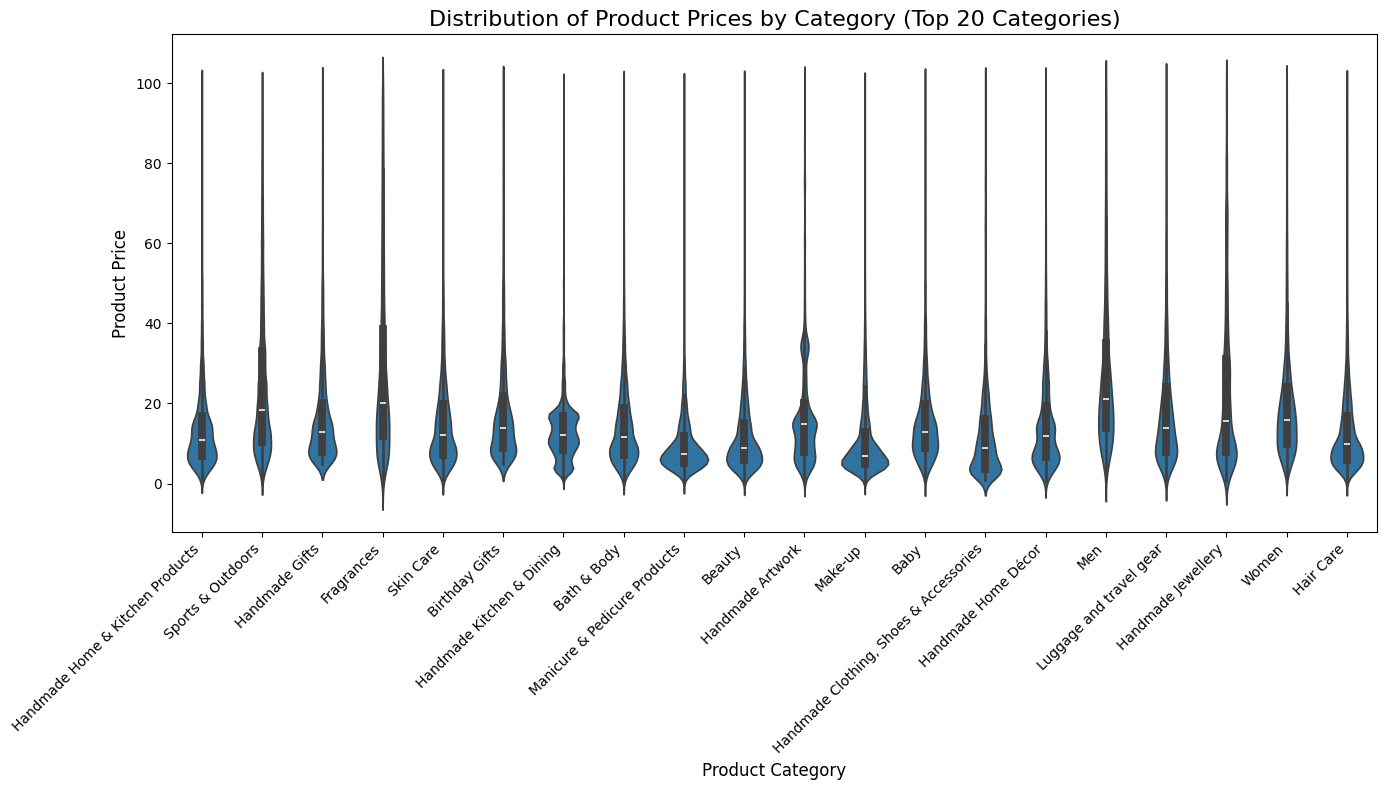

Category with the highest median price: Desktop PCs
Highest median price: 74.0


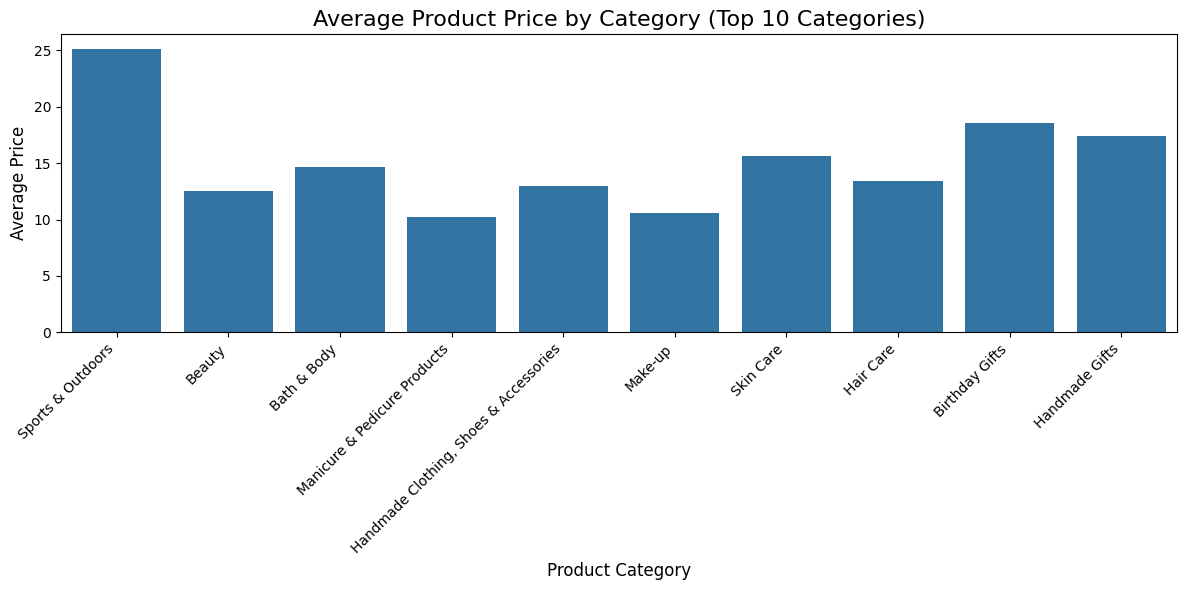

Category with the highest average price: Motherboards
Highest average price: 68.77243243243242


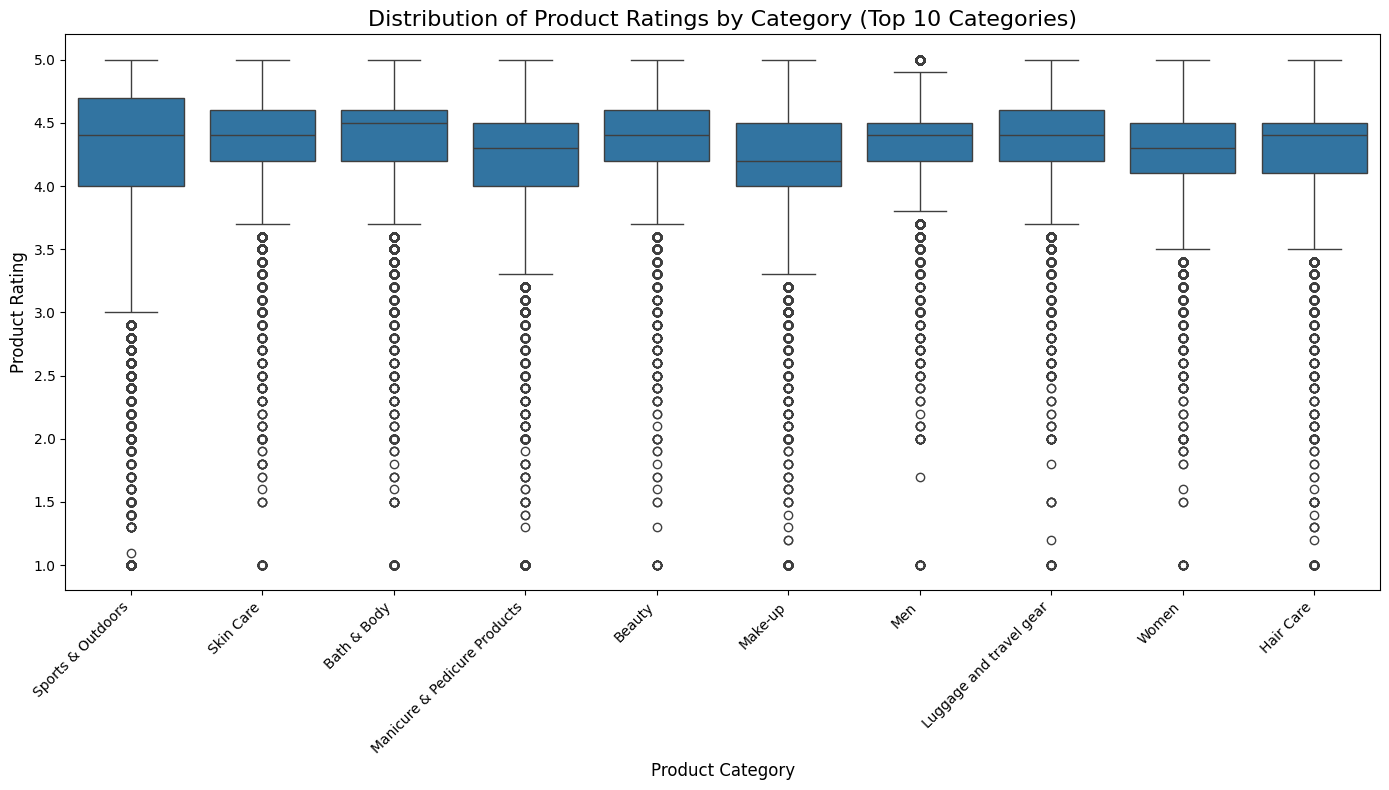

Category with the highest median rating: Handmade Artwork
Highest median rating: 5.0


In [56]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#Objective: Investigate how different product categories influence product prices.
 #   Preliminary Step: Remove outliers in product prices.
  #  For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
   # Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

# Step 1: CalculateQ1  (25th percentile), Q3 (75th percentile), and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers by removing rows where price is below lower bound or above upper bound
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the result
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

df_no_outliers

#    Violin Plots:
 #       Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
  #      Which product category tends to have the highest median price? Don't filter here by top categories.

   

category_counts = df_no_outliers['category'].value_counts()

# Get the top 20 categories by count
top_20_categories = category_counts.head(20).index

# Step 2: Create a violin plot for the top 20 categories
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=df_no_outliers[df_no_outliers['category'].isin(top_20_categories)])

# Add labels and title
plt.title('Distribution of Product Prices by Category (Top 20 Categories)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Calculate the median price for each category (without filtering top 20 categories)
median_prices = df_no_outliers.groupby('category')['price'].median()

# Find the category with the highest median price
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"Category with the highest median price: {highest_median_category}")
print(f"Highest median price: {highest_median_price}")





   # Bar Charts:
    #    Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
     #   Which product category commands the highest average price? Don't filter here by top categories.

# Step 1: Calculate the average price for each category
average_prices = df_no_outliers.groupby('category')['price'].mean()

# Step 2: Get the top 10 categories by count
category_counts = df_no_outliers['category'].value_counts()
top_10_categories = category_counts.head(10).index

# Step 3: Filter the average prices for the top 10 categories
top_10_avg_prices = average_prices[top_10_categories]

# Step 4: Create a bar chart to compare the average price for the top 10 categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_avg_prices.index, y=top_10_avg_prices.values)

# Add labels and title
plt.title('Average Product Price by Category (Top 10 Categories)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 5: Calculate the category with the highest average price (without filtering by top categories)
highest_avg_price_category = average_prices.idxmax()
highest_avg_price = average_prices.max()

print(f"Category with the highest average price: {highest_avg_price_category}")
print(f"Highest average price: {highest_avg_price}")




#    Box Plots:
 #       Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
  #      Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

# Step 1: Filter out rows where 'stars' is 0.0
df_no_outliers = df_no_outliers[df_no_outliers["stars"] != 0.0]

# Calculate the count of products per category to filter the top 10 categories
category_counts = df_no_outliers['category'].value_counts()

# Get the top 10 categories by count
top_10_categories = category_counts.head(10).index

# Step 2: Create a box plot for product ratings, filtering for the top 10 categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=df_no_outliers[df_no_outliers['category'].isin(top_10_categories)])

# Add labels and title
plt.title('Distribution of Product Ratings by Category (Top 10 Categories)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Product Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Calculate the median rating for each category (without filtering top 10 categories)
median_ratings = df_no_outliers.groupby('category')['stars'].median()

# Find the category with the highest median rating
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"Category with the highest median rating: {highest_median_rating_category}")
print(f"Highest median rating: {highest_median_rating}")


Correlation coefficient between price and stars: 0.006744508067157968
P-value: 1.0813032347774963e-12
The correlation between price and stars is statistically significant.


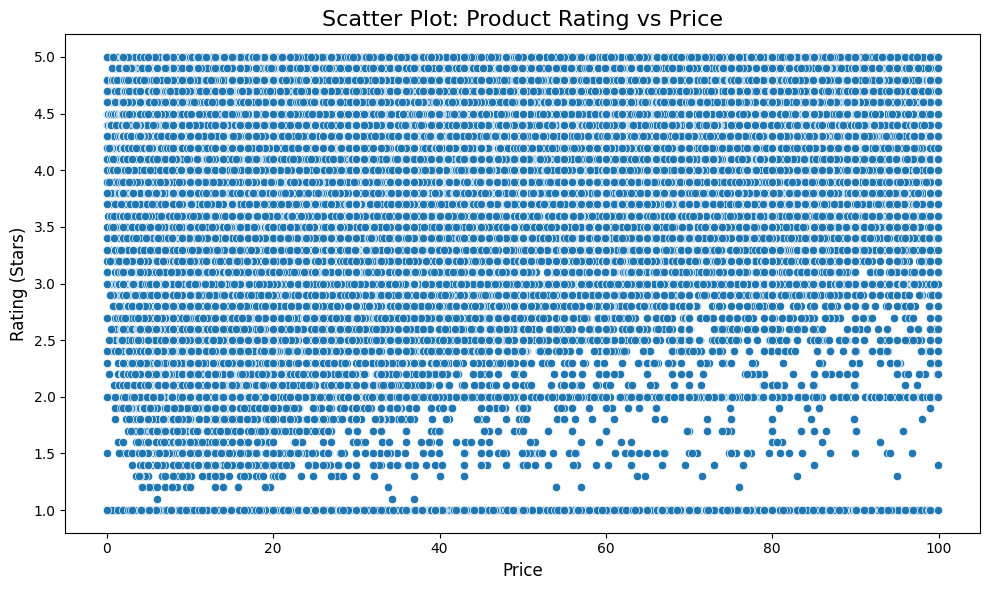

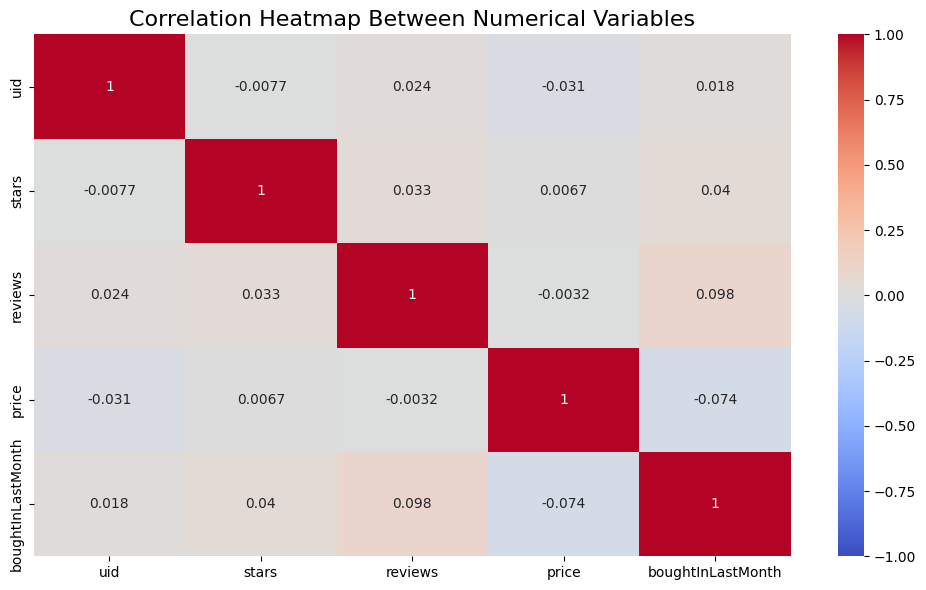

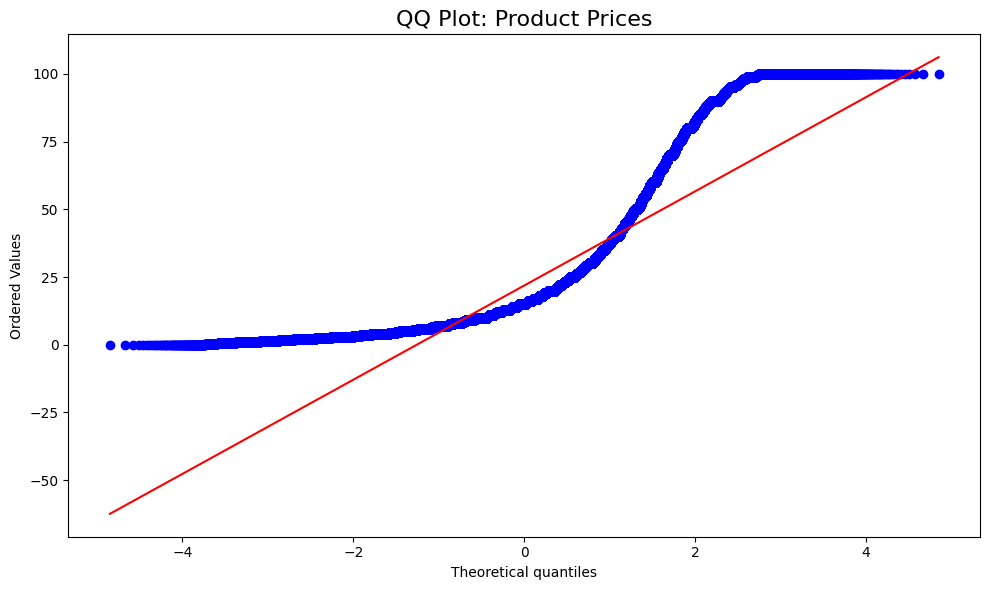

In [59]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
#Objective: Analyze how product ratings (stars) correlate with product prices.
#    Correlation Coefficients:
 #       Calculate the correlation coefficient between price and stars.
  #      Is there a significant correlation between product price and its rating?

import scipy.stats as stats

# Step 1: Calculate the correlation coefficient between price and stars
correlation_coefficient, p_value = stats.pearsonr(df_no_outliers['price'], df_no_outliers['stars'])

# Step 2: Output the correlation coefficient and p-value
print(f"Correlation coefficient between price and stars: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Step 3: Interpretation
if p_value < 0.05:
    print("The correlation between price and stars is statistically significant.")
else:
    print("The correlation between price and stars is not statistically significant.")






# Visualizations:
    #    Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
     #   Use a correlation heatmap to visualize correlations between all numerical variables.
      #  Examine if product prices typically follow a normal distribution using a QQ plot.


# 1. Scatter Plot: Relationship between product rating (stars) and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df_no_outliers)
plt.title('Scatter Plot: Product Rating vs Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Rating (Stars)', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap: Correlation between numerical variables
# Select only numerical columns for the heatmap
numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = df_no_outliers[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

# 3. QQ Plot: Check if product prices follow a normal distribution
plt.figure(figsize=(10, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot: Product Prices', fontsize=16)
plt.tight_layout()
plt.show()
